# 1. XArray พื้นฐานในการใช้อาเรย์หลายมิติ
XArray https://docs.xarray.dev/en/stable/ เป็นแพคเกจในไพธอนที่ใช้ในการจัดการข้อมูลอาเรย์หลายมิติ ในที่นี้เราจะนำมาใช้กับข้อมูลทางด้านบรรยากาศ ได้แก่ Forescasting, Reanalysis, Satellite เป็นต้น แพคเกจนี้สร้างมาด้วยการใช้พื้นฐานของ Numpy และ Pandas ทำให้หากเรียนรู้แพคเกจทั้งสองมาในเบื้องต้นแล้ว จะสามารถใช้งาน XArray ได้ไม่ยากนัก แบบฝึกหัดนี้จะเป็นการฝึกหัดใช้งาน XArray
* ดึงข้อมูล GFS ของ NCEP จาก THREDDS DATA Server เป็นข้อมูลพยากรณ์อากาศที่ได้จาก NCEP GFS Model https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.html?dataset=grib/NCEP/GFS/Global_0p25deg/Best
    * ใช้ OPENDAP ในการดึงข้อมูล https://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p25deg/Best.html
* ทำความเข้าใจโครงสร้าง XArray
* พลอตแผนที่จากตัวแปรที่สนใจ

โค้ดนำมาจากยูทูป https://www.youtube.com/watch?v=qRi5G5alJYQ&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=155

## แนะนำแหล่งเรียน Xarray
1. ติวเตอร์เรียลสอน Xarray แบบสั้นๆ ทำให้เข้าใจ netcdf และ xarray เบื้องต้นก่อน https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/4-xarray_library/

In [1]:
# นำเข้าแพคเกจ
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [2]:
# ดึงข้อมูล
best_gfs = TDSCatalog('https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best') # เปลี่ยนจาก html เป็น xml
best_ds = best_gfs.datasets[0]

In [3]:
# get ข้อมูลเข้ามาใน xarray
ds = xr.open_dataset(best_ds.access_urls['OPENDAP'])

In [4]:
# จัดเก็บข้อมูลในตัวแปร
temperature = ds.metpy.parse_cf('Temperature_surface')

In [5]:
# ตรวจข้อมูล
temperature

# สังเกตว่ามี Coordiantes กับ Attributes 
# ตรง time มีหลาย timestep

<xarray.DataArray 'Temperature_surface' (time: 117, lat: 721, lon: 1440)>
[121474080 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2022-04-18 ... 2022-05-07
    reftime    (time) datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Temperature @ Ground or water surface
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-0-0_L1
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

In [6]:
# เลือก timestep
first_temp = temperature.isel(time=0)

In [7]:
first_temp

# พบว่ามี 1 ช่วงเวลาแล้ว ต่อไปจะทำการพลอตแผนที่อย่างง่าย

<xarray.DataArray 'Temperature_surface' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time       datetime64[ns] 2022-04-18
    reftime    datetime64[ns] 2022-04-18
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Temperature @ Ground or water surface
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-0-0_L1
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\li

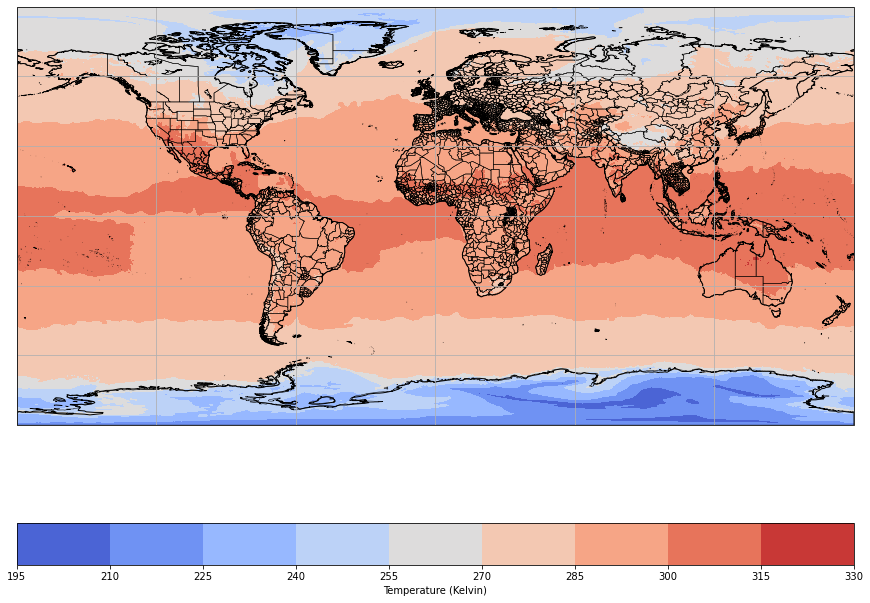

In [9]:
# เซตและพลอต
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree()) #ใช้ geopgraphic
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)

cf = ax.contourf(first_temp.lon, first_temp.lat, first_temp, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm') 

ax.coastlines()
ax.gridlines()

# add colorbar
cbar = plt.colorbar(cf, orientation='horizontal')
cbar.set_label("Temperature (Kelvin)")
plt.show()

#สังเกตุว่าเส้นโครงแผนที่ยังไม่เหมาะสม

# 2. การ subset ข้อมูล XArray ด้วยการ slicing
ใช้ข้อมูล GFS ที่เป็นข้อมูลทั้งโลก แต่ในขั้นนี้ต้องการจะตัดเอาเฉพาะข้อมูลที่ครอบคลุมประเทศไทยและอินโดจีนเท่านั้น เพื่อลดขนาดของอาเรย์ในการประมวลผล

โค้ดจากลิงก์ https://www.youtube.com/watch?v=FdYUT-w3uPw&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=156



In [10]:
# นำเข้าแพคเกจ
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [11]:
# ดึงข้อมูล
best_gfs = TDSCatalog('https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best') # เปลี่ยนจาก html เป็น xml


In [12]:
best_ds = best_gfs.datasets[0]

In [13]:
# get ข้อมูลเข้ามาใน xarray แล้วทำการเลือกพื้นที่ที่เราต้องการ
#ds = xr.open_dataset(best_ds.access_urls['OPENDAP']).sel(lon=slice(360-150, 360-50, 2), lat=slice(65, 20, 2)) # อเมริกา (360-(360-210))
ds = xr.open_dataset(best_ds.access_urls['OPENDAP']).sel(lon=slice(360-280, 360-240, 2), lat=slice(25, 0, 2)) # ไทย (360-(360-80)) ต้องการให้เริ่มที่ลองจิจูด 80 

#อธิบายการคำนวณ slice(360-280, 360-240, 2) คือ ต้องการจะให้พลอตที่ ลองจิจูด 80E - 120E เนื่องจากข้อมูลเริ่มและจบที่กรีนิช นั่นคือ หากต้องการ 80E = 360-280 หรือใช้สูตร (360-(360-80))

In [14]:
data_var = ds.metpy.parse_cf('Relative_humidity_zeroDegC_isotherm') # ดูตัวแปรจาก https://thredds-jumbo.unidata.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p25deg/Best/dataset.html

In [15]:
data_var

<xarray.DataArray 'Relative_humidity_zeroDegC_isotherm' (time: 117, lat: 51, lon: 81)>
[483327 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 25.0 24.5 24.0 23.5 23.0 ... 2.0 1.5 1.0 0.5 0.0
  * lon        (lon) float32 80.0 80.5 81.0 81.5 ... 118.5 119.0 119.5 120.0
  * time       (time) datetime64[ns] 2022-04-18 ... 2022-05-07
    reftime    (time) datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Relative humidity @ Level of 0 °C isotherm
    units:                          %
    abbreviation:                   RH
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-1-1_L4
    Grib2_Parameter:                [0 1 1]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Moisture
    Grib2_Parameter_Name:           Relative humidity
    Grib2_Level_Type:               4
    Grib2_Level_Desc:               Level of 0 °C isotherm
    Grib2_Generating_Process_Type:  Forecast

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
%matplotlib inline

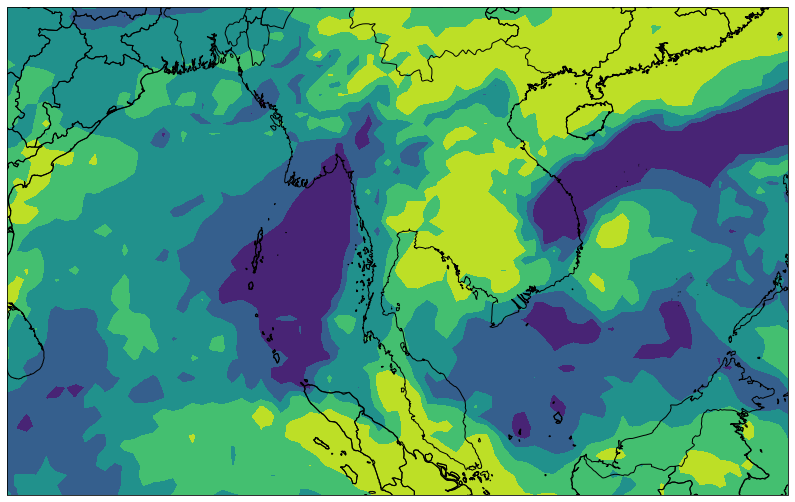

In [18]:
# พลอตแรก
fig = plt.figure(figsize=(14, 20))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)
ax.contourf(data_var.lon, data_var.lat, data_var.isel(time=0), levels=np.arange(0, 110, 20))
ax.coastlines(color='black', resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('50m'))

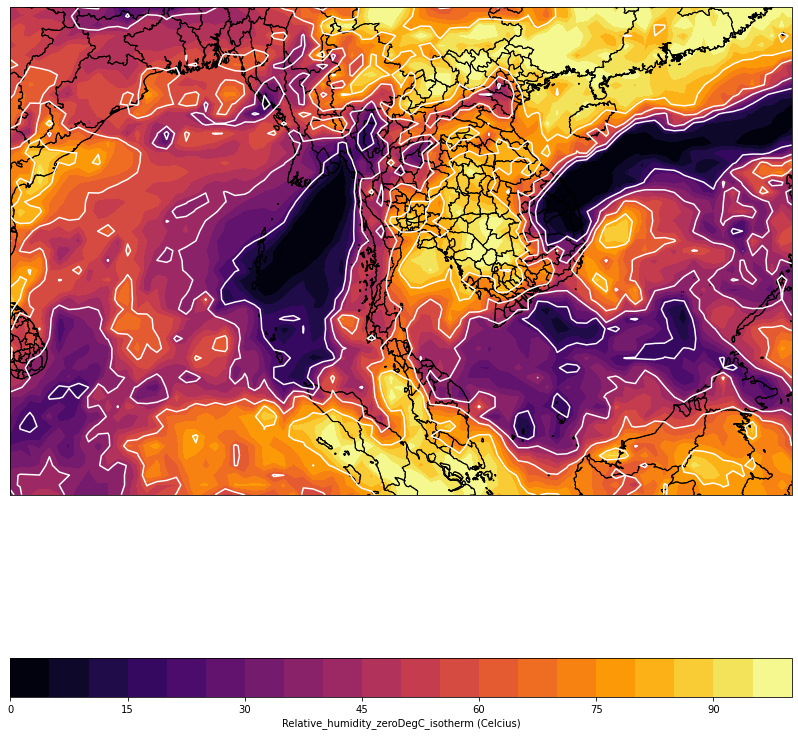

In [20]:
# พลอต contour เพิ่ม
fig = plt.figure(figsize=(14, 20))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)
cf = ax.contourf(data_var.lon, data_var.lat, data_var.isel(time=0), levels=np.arange(0, 101, 5), cmap='inferno') #พลอต shade 
ax.contour(data_var.lon, data_var.lat, data_var.isel(time=0), colors= 'white', levels=np.arange(0, 110, 20)) #เพิ่มเส้น contour
ax.coastlines(color='black', resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'))
#plt.colorbar(cf, orientation='horizontal')

# add colorbar
cbar = plt.colorbar(cf, orientation='horizontal')
cbar.set_label("Relative_humidity_zeroDegC_isotherm (Celcius)")
plt.show()

# 3.ทำความเข้าใจ XArray ให้มากขึ้น
ทำความเข้าใจในรายละเอียดโครงสร้างข้อมูลที่เก็บใน XArray ด้วยการใช้ข้อมูลฟอร์แมท NetCDF *.nc ซึ่งเป็นฟอร์แมทมาตรฐานที่นิยมนำมาใช้ในงานด้านบรรยากาศศาสตร์ ศึกษาเพิ่มเติมจาก https://en.wikipedia.org/wiki/NetCDF และ https://www.unidata.ucar.edu/software/netcdf/

นิสิตสามารถศึกษา XArray จากยูทูปลิงก์นี้ได้ https://www.youtube.com/watch?v=1AtfxsglBjs&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=157

ศึกษาเพิ่มเติมในเรื่องโครงสร้างของ XArray ได้จากลิงก์นี้ https://xarray.pydata.org/en/stable/user-guide/data-structures.html

In [1]:
import xarray as xr

from metpy.cbook import get_test_data


In [2]:
# get ข้อมูลตัวอย่างพายุเฮอริเคน Irma
data = xr.open_dataset(get_test_data('irma_gfs_example.nc', False))

## 3.1 Dataset
เป็นชุดข้อมูลที่เก็บในรูปแบบอาเรย์หลายมิติ ประกอบไปด้วย data variables, dimensions, coordinates และ attributres
* Dimensions: สังเกตุว่ามี isobric อยู่ 2 ค่า หมายความว่าเราไม่สามารถคำนวณค่าตัวแปรบางตัวในระดับความสูงเดียวกันได้
* Coordinates: ตรงกับ Dimension
* Data variables: เก็บค่าข้อมูลแต่ละตัวแปรที่ได้จากแบบจำลอง GFS
* Attributres: เป็น metadata

In [4]:
# ตรวจดูข้อมูล
data

<xarray.Dataset>
Dimensions:                              (time1: 9, latitude: 81, isobaric3: 31, isobaric1: 21, longitude: 131)
Coordinates:
  * time1                                (time1) datetime64[ns] 2017-09-05T12...
    reftime                              datetime64[ns] 2017-09-05T12:00:00
  * latitude                             (latitude) float32 50.0 49.5 ... 10.0
  * isobaric3                            (isobaric3) float64 100.0 ... 1e+05
  * isobaric1                            (isobaric1) float64 1e+04 ... 1e+05
  * longitude                            (longitude) float32 250.0 ... 315.0
Data variables:
    Vertical_velocity_pressure_isobaric  (time1, isobaric1, latitude, longitude) float32 ...
    Relative_humidity_isobaric           (time1, isobaric3, latitude, longitude) float32 ...
    Temperature_isobaric                 (time1, isobaric3, latitude, longitude) float32 ...
    u-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    v-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    Geopotential_height_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E         int32 -2147483647
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

## 3.2 Variables/DataArrays
การใช้ข้อมูลจะไม่เรียกใช้ตัวแปร (variables)โดยตรง โดยตัวแปรจะประกอบไปด้วย dimensions, data และ attribute ของแต่ละตัวแปรที่แตกต่างกันไป 
ในขณะที่ DataArrays เป็นอาเรย์หลายมิติที่ประกอบไปด้วย dimension names, coordinates และ attributres

In [5]:
data['Temperature_isobaric'] #DataArray ใช้สไตล์ดิกชันนารีเหมือนกับ pandas

<xarray.DataArray 'Temperature_isobaric' (time1: 9, isobaric3: 31, latitude: 81, longitude: 131)>
[2960469 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:0...
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

### 3.2.1 Dimensions
Dimensions คือ แกน (axis) ข้อมูล คล้ายคลึงกันกับการใช้แกน x,y หรือ z แทนความสูง หลักการเดียวกันกับการอ้างอิง numpy

### 3.2.2 Coordinates
Coordinates คือ ชื่อของ dimension โดยที่ dimension ใดๆ สามารถที่จะมี coordinate ได้มากกว่า 1 ยกตัวอย่างเช่น ความสูงจากระดับน้ำทะเล (MSL) หรือความสูงจากพื้นดิน (AGL) หรือระดับความกดอากาศ

In [6]:
data['Temperature_isobaric'] .dims
# สังเกตุว่าค่า dimension มีอยู่ 4 จำนวนในที่นี้

('time1', 'isobaric3', 'latitude', 'longitude')

In [7]:
data['Temperature_isobaric'] .coords
# สังเกตุว่าเวลาที่เป็นค่า coordinate มีหลายค่า เช่นเดียวกันกับค่า coordinate อื่นๆ 

Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:0...
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0

เครื่องหมาย * ที่อยู่ด้านหน้า coordinates แสดงถึงค่า dimensioned cordinates นั่นคือ เป็นค่า coordinated ที่สอดคล้องกับ dimension ของ DataArray  ในขณะที่หากไม่มีเครื่องหมาย* อยู่ด้านหน้า จะหมายถึง non-dimensioned coordinate และ เป็น coordinate ที่ไม่ได้ถูกทำดัชนีหรือ not indexed สามารถนำมาใช้ในการทำป้ายชื่อหรือ label ข้อมูลได้

# 4. สร้าง XArray จาก scratch เพื่อให้เข้าใจมากขึ้น


In [27]:
import xarray as xr
import numpy as np

In [28]:
x = np.array([[1, 2,  3, 4],
                     [1, 2,  3, 4],
                     [1, 2,  3, 4],
                     [1, 2,  3, 4]])
y = np.array([[1, 1, 1, 1],
                     [2, 2, 2, 2],
                     [3, 3, 3, 3]])
temps = np.array([[23, 23, 24, 23],
                            [24, 24, 28, 23],
                            [23, 22, 24, 22]])
humids = np.array([[70, 69, 69, 70],
                             [68, 68, 60, 64],
                             [71, 70, 70, 68]])

In [29]:
np.shape(temps)

(3, 4)

In [30]:
# สร้าง data array โดยกำหนดค่า dimension
humidity_da = xr.DataArray(humids, dims=['y', 'x'])

In [31]:
humidity_da

<xarray.DataArray (y: 3, x: 4)>
array([[70, 69, 69, 70],
       [68, 68, 60, 64],
       [71, 70, 70, 68]])
Dimensions without coordinates: y, x

* สังเกตุว่าตอนนี้เรามีอาเรย์ แต่ยังไม่มีค่า coordinates กับ ค่า attributes

In [32]:
# กำหนดค่า coordinates
humidity_da = xr.DataArray(humids, coords=(y[:, 0], x[0, :]))

In [33]:
humidity_da

<xarray.DataArray (dim_0: 3, dim_1: 4)>
array([[70, 69, 69, 70],
       [68, 68, 60, 64],
       [71, 70, 70, 68]])
Coordinates:
  * dim_0    (dim_0) int32 1 2 3
  * dim_1    (dim_1) int32 1 2 3 4

* ตอนนี้มี coordinates เพิ่มเข้ามาแล้ว

In [34]:
# กำหนดค่า coords กับ dims พร้อมกัน
humidity_da = xr.DataArray(humids, coords=(y[:, 0], x[0, :]), dims=['y', 'x'])

In [35]:
humidity_da

<xarray.DataArray (y: 3, x: 4)>
array([[70, 69, 69, 70],
       [68, 68, 60, 64],
       [71, 70, 70, 68]])
Coordinates:
  * y        (y) int32 1 2 3
  * x        (x) int32 1 2 3 4

* ตอนนี้พบว่า DataArray และ coordinate จะสอดคล้องกันแล้ว

In [36]:
# กำหนดค่า attributes
humidity_da.name = 'Relative Humidity'
humidity_da.attrs['units'] = 'percent'

In [37]:
humidity_da

<xarray.DataArray 'Relative Humidity' (y: 3, x: 4)>
array([[70, 69, 69, 70],
       [68, 68, 60, 64],
       [71, 70, 70, 68]])
Coordinates:
  * y        (y) int32 1 2 3
  * x        (x) int32 1 2 3 4
Attributes:
    units:    percent

* สังเกตุว่า Attributes มีหน่วยปรากฏแล้ว

In [38]:
# ต่อไปให้สร้างของ temp 
temp_da = xr.DataArray(temps, coords=(y[:, 0], x[0, :]), dims=('y', 'x'))
temp_da.name = 'Air Temperature'
temp_da.attrs['units'] = 'degC'

In [39]:
temp_da

<xarray.DataArray 'Air Temperature' (y: 3, x: 4)>
array([[23, 23, 24, 23],
       [24, 24, 28, 23],
       [23, 22, 24, 22]])
Coordinates:
  * y        (y) int32 1 2 3
  * x        (x) int32 1 2 3 4
Attributes:
    units:    degC